# Portfolio Analysis Tutorial

This notebook will give an overview of how to load data from an input data source and analyse the portfolio.

In [36]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# !pip install nb_black
%load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


&lt;IPython.core.display.Javascript object&gt;

In [37]:
import sys
sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import ffn

from src.data_loader import StockPriceLoader

&lt;IPython.core.display.Javascript object&gt;

## Input data format

The input for this analysis is a `csv` file containing rows for each purchase (or disposal) of a stock in your portfolio. An example is given in the `../data/raw/purchase_info.csv` in this repository.

In [39]:
pd.read_csv("../data/raw/purchase_info.csv")

,date,company,yahoo_ticker,currency,shares_purchased,purchase_price_usd,trading_costs_usd,total_cost_usd,total_shares_held
0,17/07/2019,Nvidia,NVDA,USD,39,166.6700,4.95,6505.08,39
1,17/07/2019,Intel,INTC,USD,180,49.9100,4.95,8988.75,180
2,17/07/2019,Applied Materials,AMAT,USD,268,45.9151,4.95,12310.20,268
3,17/07/2019,MKS Instruments,MKSI,USD,120,76.7449,4.95,9214.34,120
4,17/07/2019,Synopsys,SNPS,USD,68,136.8084,4.95,9307.92,68
5,17/07/2019,SOXX ETF,SOXX,USD,75,204.2607,4.95,15324.50,75
6,24/07/2019,Tokyo Electron,8035.T,JPY,100,168.4135,126.31,16967.66,100
7,24/07/2019,BE Semiconductor Industries,BESI.AS,EUR,420,29.9253,100.00,12668.63,420


&lt;IPython.core.display.Javascript object&gt;

## Load Stock Prices

Load the daily closing stock prices for all stocks you have held starting from the earliest date.

Note this assumes your input data file is stored in `../data/raw/purchase_info.csv`, however, you can specify your own location using the `input_data_source` argument.

The `StockPriceLoader` class uses the `ffn` library to load the stock prices for free from Yahoo ([see ffn library for more details](https://pmorissette.github.io/ffn/)).

In [40]:
# load stock prices
prices = StockPriceLoader()

&lt;IPython.core.display.Javascript object&gt;

In [41]:
# __repr__
prices

Tickers: [&#39;NVDA&#39;, &#39;INTC&#39;, &#39;AMAT&#39;, &#39;MKSI&#39;, &#39;SNPS&#39;, &#39;SOXX&#39;, &#39;8035.T&#39;, &#39;BESI.AS&#39;]
Start Date: 2019-07-17 00:00:00

&lt;IPython.core.display.Javascript object&gt;

In [42]:
# show prices
prices.daily_stock_prices.head(10)

,nvda,intc,amat,mksi,snps,soxx,8035t,besias
Date,,,,,,,,
2019-07-17,169.188049,47.952766,45.377625,77.286873,135.750000,201.027237,15937.312500,23.886831
2019-07-18,169.656601,48.486755,47.292084,79.584183,136.039993,203.936676,15865.198242,23.770264
2019-07-19,167.921951,48.807159,46.938648,78.425613,134.990005,203.700790,16418.076172,24.576529
2019-07-22,170.793091,49.855732,49.805428,82.247879,135.419998,207.593140,16605.574219,25.557648
2019-07-23,175.119736,50.244091,50.099960,83.960953,136.160004,210.256882,17110.376953,25.917067
2019-07-24,178.110519,51.380039,51.189732,88.664520,137.619995,216.665527,17211.335938,26.801044
2019-07-25,172.846756,50.642159,49.893784,85.703758,137.500000,213.028702,17836.328125,27.189606
2019-07-26,174.531570,50.088745,49.815247,86.713776,137.089996,212.969757,17591.140625,26.985613
2019-07-29,174.282349,50.981976,49.746525,87.020744,136.210007,213.549667,17451.716797,26.499910


&lt;IPython.core.display.Javascript object&gt;

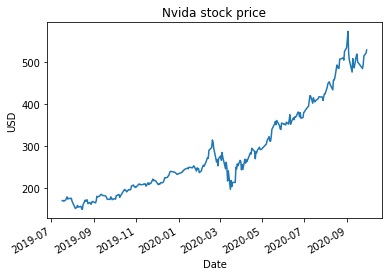

&lt;IPython.core.display.Javascript object&gt;

In [47]:
prices.daily_stock_prices['nvda'].plot()
plt.title("Nvida stock price")
plt.ylabel("USD")
plt.show()